<a href="https://colab.research.google.com/github/RIT20/fairseq/blob/master/Convin_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 2.6 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 42.3 MB/s 
     |████████████████████████████████| 636 kB 50.5 MB/s 
     |████████████████████████████████| 3.3 MB 46.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 264 kB 5.0 MB/s 
     |████████████████████████████████| 118 kB 54.0 MB/s 
     |████████████████████████████████| 243 kB 44.3 MB/s 
     |████████████████████████████████| 76 kB 4.1 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
pip install pydub

In [9]:
import soundfile as sf
import torch
from datasets import load_dataset
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
from IPython.display import Audio
from scipy.io import wavfile
import numpy as np
import librosa, librosa.display

In [2]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("/content/drive/MyDrive/Convin.Ai/sample_audio_1.mp3")
sound.export("/content/drive/MyDrive/Convin.Ai/sample_audio_1.wav", format="wav")

<_io.BufferedRandom name='/content/drive/MyDrive/Convin.Ai/sample_audio_1.wav'>

In [10]:
file_name = '/content/drive/MyDrive/Convin.Ai/sample_audio_1.wav'
Audio(file_name)


In [ ]:
data = wavfile.read(file_name)
framerate = data[0]
sounddata = data[1]
time = np.arange(0,len(sounddata))/framerate
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

In [21]:
input_audio, sample_rate = librosa.load(file_name, 
                              sr=16000)

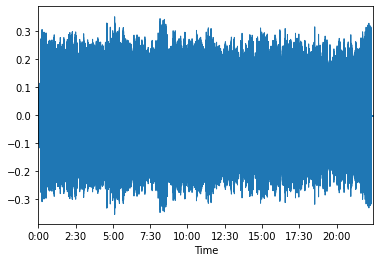

In [23]:

#plot between amplitude and time
librosa.display.waveplot(input_audio, sr = sample_rate)

In [22]:
input_values = processor(input_audio, sampling_rate=sample_rate, return_tensors="pt").input_values

In [ ]:
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)

In [ ]:
transcription = processor.decode(predicted_ids[0])

In [12]:
input_values = tokenizer(input_audio, return_tensors="pt").input_values


In [ ]:
logits = model(input_values).logits


In [ ]:
predicted_ids = torch.argmax(logits, dim=-1)


In [ ]:
transcription = tokenizer.decode(predicted_ids[0])
#generated transcript
transcription

In [17]:

target_transcription = open("/content/drive/MyDrive/Convin.Ai/task_Script.txt", "r")
target_transcription.read()

"HELLO EVERYONE THIS IS JANEED HERE FROM\nEDURAKA AND I WELCOME YOU ALL TO THIS\nINTERESTING SESSION\nWHERE WE ARE GOING TO TURN ANY IMAGE\nTHAT WE GIVE INTO A CARTOONS\nSO WITHOUT ANY FURTHER ADO LET ME\nQUICKLY WALK YOU THROUGH TODAY'S AGENDA\nWE'LL START THIS SESSION BY\nUNDERSTANDING THE PROBLEM STATEMENT AND\nWHAT EXACTLY WOULD BE ITS WORKFLOW\nFOLLOWING THAT I'LL BE WALKING YOU\nTHROUGH THE DIFFERENT TOOLS AND\nFRAMEWORKS THAT WE'RE GOING TO USE\nAND FINALLY WE'LL START BUILDING UP THIS\nPROJECT ALL RIGHT SO BEFORE WE BEGIN DO\nCONSIDER SUBSCRIBING TO OUR YOUTUBE\nCHANNEL AND HIT THE BELL ICON TO STAY\nUPDATED ON TRENDING TECHNOLOGIES\nAND ALSO IF YOU'RE LOOKING FORWARD FOR\nPYTHON TRAINING CERTIFICATION PLEASE\nCHECK OUT THE LINK GIVEN IN THE\nDESCRIPTION BOX BELOW\nALL RIGHT GUYS COMING BACK TO OUR\nPROJECT RIGHT SO WHAT EXACTLY ARE WE\nGONNA DO HERE\nWELL YOU SEE YOU MIGHT HAVE HEARD OF\nTHESE FILTERS RIGHT LIKE ANYTHING ON\nSNAPCHAT OR WE ALSO HAVE THIS PIXAR\nWHEREIN WE PROV

In [ ]:
with processor.as_target_processor():
  labels = processor(target_transcription, return_tensors="pt").input_ids

# compute loss by passing labels
loss = model(input_values, labels=labels).loss
loss.backward()

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
